In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from api_keys import datagov_api_key
import math

In [2]:
school_info_df = pd.read_csv('all_interesting_info.csv')
school_info_df.head()

,id,latest.admissions.admission_rate.overall,latest.aid.median_debt.completers.overall,latest.aid.median_debt.female_students,latest.aid.median_debt.male_students,latest.aid.median_debt.noncompleters,latest.completion.completion_rate_4yr_150nt,latest.completion.completion_rate_four_year_100_pooled,latest.cost.attendance.academic_year,latest.cost.tuition.in_state,...,latest.repayment.5_yr_repayment.completers_rate,latest.repayment.5_yr_repayment.female_students_rate,latest.repayment.5_yr_repayment.male_students_rate,latest.repayment.7_yr_repayment.completers_rate,latest.repayment.7_yr_repayment.female_students_rate,latest.repayment.7_yr_repayment.male_students_rate,latest.student.demographics.female_share,location.lat,location.lon,school.name
0,459842,1.0000,23139.5,12250.0,9500.0,7730.0,0.3478,0.2000,26772.0,13390.0,...,0.495575,0.316121,0.364816,0.627481,0.374540,0.556589,0.813547,42.603889,-87.857452,Herzing University-Kenosha
1,457022,1.0000,23139.5,12250.0,9500.0,7730.0,0.2708,0.4000,26916.0,13390.0,...,0.495575,0.316121,0.364816,0.627481,0.374540,0.556589,0.813547,41.639266,-83.665453,Herzing University-Toledo
2,184694,0.7909,25000.0,20000.0,16709.0,9649.0,0.5317,0.3850,53748.0,40234.0,...,0.777037,0.670504,0.683209,0.861512,0.730086,0.767308,0.588029,40.774498,-74.432121,Fairleigh Dickinson University-Florham Campus
3,445708,0.8174,25899.0,17850.0,17668.0,7666.5,0.5722,0.3753,44949.0,30746.0,...,0.822471,0.696578,0.681546,0.810641,0.705139,0.672380,0.635340,35.233502,-80.851208,Johnson & Wales University-Charlotte
4,146481,0.5694,27000.0,26000.0,25500.0,8250.0,0.6990,0.6482,54777.0,44116.0,...,0.899160,0.818462,0.832618,0.934247,0.894737,0.859649,0.603041,42.249574,-87.827454,Lake Forest College


In [3]:
school_info_df.dtypes

id                                                                         int64
latest.admissions.admission_rate.overall                                 float64
latest.aid.median_debt.completers.overall                                float64
latest.aid.median_debt.female_students                                   float64
latest.aid.median_debt.male_students                                     float64
latest.aid.median_debt.noncompleters                                     float64
latest.completion.completion_rate_4yr_150nt                              float64
latest.completion.completion_rate_four_year_100_pooled                   float64
latest.cost.attendance.academic_year                                     float64
latest.cost.tuition.in_state                                             float64
latest.cost.tuition.out_of_state                                         float64
latest.earnings.10_yrs_after_entry.female_students                       float64
latest.earnings.10_yrs_after

In [4]:
school_cost_df = school_info_df[['id', 'school.name', 'latest.cost.attendance.academic_year', 'location.lat', 'location.lon',
                'latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
                'latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev',
                'latest.earnings.8_yrs_after_entry.mean_earnings',
                'latest.earnings.8_yrs_after_entry.std_deviation',
                'latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings',
                'latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev',
                'latest.earnings.7_yrs_after_entry.mean_earnings',
                'latest.earnings.7_yrs_after_entry.std_dev'
                                ]]

school_cost_df.head()

,id,school.name,latest.cost.attendance.academic_year,location.lat,location.lon,latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.8_yrs_after_entry.mean_earnings,latest.earnings.8_yrs_after_entry.std_deviation,latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.7_yrs_after_entry.mean_earnings,latest.earnings.7_yrs_after_entry.std_dev
0,459842,Herzing University-Kenosha,26772.0,42.603889,-87.857452,41600.0,27900.0,35100.0,24200.0,30100.0,20500.0,37800.0,23100.0
1,457022,Herzing University-Toledo,26916.0,41.639266,-83.665453,41600.0,27900.0,35100.0,24200.0,30100.0,20500.0,37800.0,23100.0
2,184694,Fairleigh Dickinson University-Florham Campus,53748.0,40.774498,-74.432121,54400.0,44900.0,48800.0,35400.0,42300.0,29100.0,43600.0,30800.0
3,445708,Johnson & Wales University-Charlotte,44949.0,35.233502,-80.851208,42200.0,28500.0,37600.0,24300.0,33400.0,19500.0,33800.0,21600.0
4,146481,Lake Forest College,54777.0,42.249574,-87.827454,55600.0,35300.0,50900.0,33700.0,41100.0,25700.0,42700.0,26300.0


In [5]:
base_url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json'

params = {'api_key': datagov_api_key,
          'school.institutional_characteristics.level': '1',
          'school.online_only': '0',
          '_fields': f'id,latest.earnings.6_yrs_after_entry.working_not_enrolled.overall,latest.earnings.7_yrs_after_entry.working_not_enrolled,latest.earnings.8_yrs_after_entry.working_not_enrolled,latest.earnings.10_yrs_after_entry.working_not_enrolled.overall',
          '_per_page': '100',
          '_page': 0
          }

response = requests.get(base_url, params=params)
response_json = response.json()

In [6]:
print(response.url)

https://api.data.gov/ed/collegescorecard/v1/schools.json?api_key=95NUxUNsxpqwpk1Yo0Wx4QVCzcimu6euaUdOtmXW&school.institutional_characteristics.level=1&school.online_only=0&_fields=id%2Clatest.earnings.6_yrs_after_entry.working_not_enrolled.overall%2Clatest.earnings.7_yrs_after_entry.working_not_enrolled%2Clatest.earnings.8_yrs_after_entry.working_not_enrolled%2Clatest.earnings.10_yrs_after_entry.working_not_enrolled.overall&_per_page=100&_page=0


In [7]:
num_elements_df = pd.DataFrame(response_json['results'])
num_elements_df.head()

,id,latest.earnings.10_yrs_after_entry.working_not_enrolled.overall,latest.earnings.6_yrs_after_entry.working_not_enrolled.overall,latest.earnings.7_yrs_after_entry.working_not_enrolled,latest.earnings.8_yrs_after_entry.working_not_enrolled
0,193894,NaN,NaN,NaN,NaN
1,139287,NaN,NaN,NaN,NaN
2,449038,9086.0,16069.0,7290.0,11219.0
3,450298,9086.0,16069.0,7290.0,11219.0
4,182917,NaN,NaN,NaN,NaN


In [8]:
num_pages = round(response_json['metadata']['total'] / response_json['metadata']['per_page'])
num_pages

29

In [9]:
for i in range(1,num_pages + 1):
    params = {'api_key': datagov_api_key,
          'school.institutional_characteristics.level': '1',
          'school.online_only': '0',
          '_fields': f'id,latest.earnings.6_yrs_after_entry.working_not_enrolled.overall,latest.earnings.7_yrs_after_entry.working_not_enrolled,latest.earnings.8_yrs_after_entry.working_not_enrolled,latest.earnings.10_yrs_after_entry.working_not_enrolled.overall',
          '_per_page': '100',
          '_page': i
          }
    response = requests.get(base_url, params=params)
    response_json = response.json()
    next_response_df = pd.DataFrame(response_json['results'])
    
    num_elements_df = num_elements_df.append(next_response_df)

In [10]:
num_elements_df.head()

,id,latest.earnings.10_yrs_after_entry.working_not_enrolled.overall,latest.earnings.6_yrs_after_entry.working_not_enrolled.overall,latest.earnings.7_yrs_after_entry.working_not_enrolled,latest.earnings.8_yrs_after_entry.working_not_enrolled
0,193894,NaN,NaN,NaN,NaN
1,139287,NaN,NaN,NaN,NaN
2,449038,9086.0,16069.0,7290.0,11219.0
3,450298,9086.0,16069.0,7290.0,11219.0
4,182917,NaN,NaN,NaN,NaN


In [11]:
final_school_cost_df = pd.merge(school_cost_df,num_elements_df,on='id',how='inner')
final_school_cost_df.head()

,id,school.name,latest.cost.attendance.academic_year,location.lat,location.lon,latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.8_yrs_after_entry.mean_earnings,latest.earnings.8_yrs_after_entry.std_deviation,latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.7_yrs_after_entry.mean_earnings,latest.earnings.7_yrs_after_entry.std_dev,latest.earnings.10_yrs_after_entry.working_not_enrolled.overall,latest.earnings.6_yrs_after_entry.working_not_enrolled.overall,latest.earnings.7_yrs_after_entry.working_not_enrolled,latest.earnings.8_yrs_after_entry.working_not_enrolled
0,459842,Herzing University-Kenosha,26772.0,42.603889,-87.857452,41600.0,27900.0,35100.0,24200.0,30100.0,20500.0,37800.0,23100.0,788.0,2348.0,465.0,1530.0
1,457022,Herzing University-Toledo,26916.0,41.639266,-83.665453,41600.0,27900.0,35100.0,24200.0,30100.0,20500.0,37800.0,23100.0,788.0,2348.0,465.0,1530.0
2,184694,Fairleigh Dickinson University-Florham Campus,53748.0,40.774498,-74.432121,54400.0,44900.0,48800.0,35400.0,42300.0,29100.0,43600.0,30800.0,2006.0,1926.0,1718.0,2027.0
3,445708,Johnson & Wales University-Charlotte,44949.0,35.233502,-80.851208,42200.0,28500.0,37600.0,24300.0,33400.0,19500.0,33800.0,21600.0,7945.0,7340.0,7466.0,7586.0
4,146481,Lake Forest College,54777.0,42.249574,-87.827454,55600.0,35300.0,50900.0,33700.0,41100.0,25700.0,42700.0,26300.0,417.0,NaN,336.0,403.0


In [12]:
cln_final_school_cost_df = final_school_cost_df.dropna(how='any')
cln_final_school_cost_df.count()

id                                                                       1161
school.name                                                              1161
latest.cost.attendance.academic_year                                     1161
location.lat                                                             1161
location.lon                                                             1161
latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings    1161
latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev          1161
latest.earnings.8_yrs_after_entry.mean_earnings                          1161
latest.earnings.8_yrs_after_entry.std_deviation                          1161
latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings     1161
latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev           1161
latest.earnings.7_yrs_after_entry.mean_earnings                          1161
latest.earnings.7_yrs_after_entry.std_dev                       

In [13]:
six_school_cost_df = cln_final_school_cost_df[['id', 'school.name', 'latest.cost.attendance.academic_year',
                                          'location.lat', 'location.lon',
                                          'latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings',
                                          'latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev',
                                          'latest.earnings.6_yrs_after_entry.working_not_enrolled.overall'
                                           ]]

six_means = six_school_cost_df['latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings']
six_sds = six_school_cost_df['latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev']
six_samps = six_school_cost_df['latest.earnings.6_yrs_after_entry.working_not_enrolled.overall']

seven_school_cost_df = cln_final_school_cost_df[['id', 'school.name', 'latest.cost.attendance.academic_year',
                                          'location.lat', 'location.lon',
                                          'latest.earnings.7_yrs_after_entry.mean_earnings',
                                          'latest.earnings.7_yrs_after_entry.std_dev',
                                          'latest.earnings.7_yrs_after_entry.working_not_enrolled'
                                           ]]

seven_means = seven_school_cost_df['latest.earnings.7_yrs_after_entry.mean_earnings']
seven_sds = seven_school_cost_df['latest.earnings.7_yrs_after_entry.std_dev']
seven_samps = seven_school_cost_df['latest.earnings.7_yrs_after_entry.working_not_enrolled']

eight_school_cost_df = cln_final_school_cost_df[['id', 'school.name', 'latest.cost.attendance.academic_year',
                                          'location.lat', 'location.lon',
                                          'latest.earnings.8_yrs_after_entry.mean_earnings',
                                          'latest.earnings.8_yrs_after_entry.std_deviation',
                                          'latest.earnings.8_yrs_after_entry.working_not_enrolled'
                                           ]]

eight_means = eight_school_cost_df['latest.earnings.8_yrs_after_entry.mean_earnings']
eight_sds = eight_school_cost_df['latest.earnings.8_yrs_after_entry.std_deviation']
eight_samps = eight_school_cost_df['latest.earnings.8_yrs_after_entry.working_not_enrolled']

ten_school_cost_df = cln_final_school_cost_df[['id', 'school.name', 'latest.cost.attendance.academic_year',
                                          'location.lat', 'location.lon',
                                          'latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
                                          'latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev',
                                          'latest.earnings.10_yrs_after_entry.working_not_enrolled.overall'
                                           ]]

ten_means = ten_school_cost_df['latest.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings']
ten_sds = ten_school_cost_df['latest.earnings.10_yrs_after_entry.working_not_enrolled.std_dev']
ten_samps = ten_school_cost_df['latest.earnings.10_yrs_after_entry.working_not_enrolled.overall']

In [22]:
six_school_cost_df['Std Error of Mean'] = six_sds / six_samps.apply(np.sqrt)

seven_school_cost_df['Std Error of Mean'] = seven_sds / seven_samps.apply(np.sqrt)

eight_school_cost_df['Std Error of Mean'] = eight_sds / eight_samps.apply(np.sqrt)

ten_school_cost_df['Std Error of Mean'] = ten_sds / ten_samps.apply(np.sqrt)

six_school_cost_df.to_csv('six_yr_school_costs.csv', index=False)
seven_school_cost_df.to_csv('seven_yr_school_costs.csv', index=False)
eight_school_cost_df.to_csv('eight_yr_school_costs.csv', index=False)
ten_school_cost_df.to_csv('ten_yr_school_costs.csv', index=False)

/Users/Decker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Decker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Decker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [15]:
x_axis = cln_final_school_cost_df['latest.cost.attendance.academic_year'].values

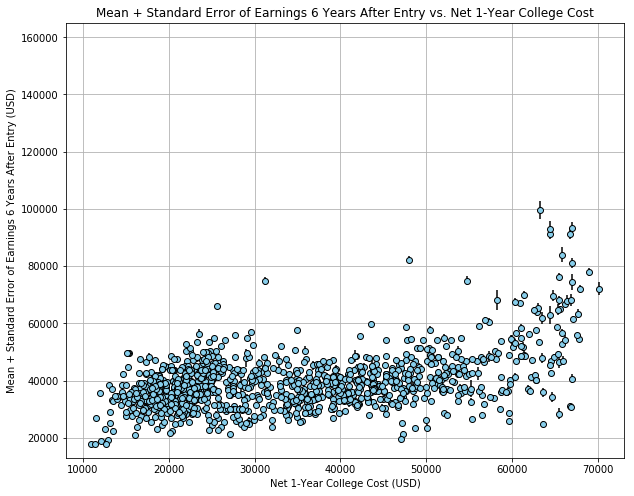

In [24]:
six_means_ls = six_means.tolist()
six_sems_ls = six_school_cost_df['Std Error of Mean'].tolist()

fig6, ax6 = plt.subplots(figsize=(10,8))

ax6.errorbar(x_axis, six_means_ls, six_sems_ls, fmt="o", color='skyblue', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 6 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 6 Years After Entry (USD)')
plt.grid()
plt.ylim(13000,165000);

plt.savefig('6yr_earnings_v_cost.png')

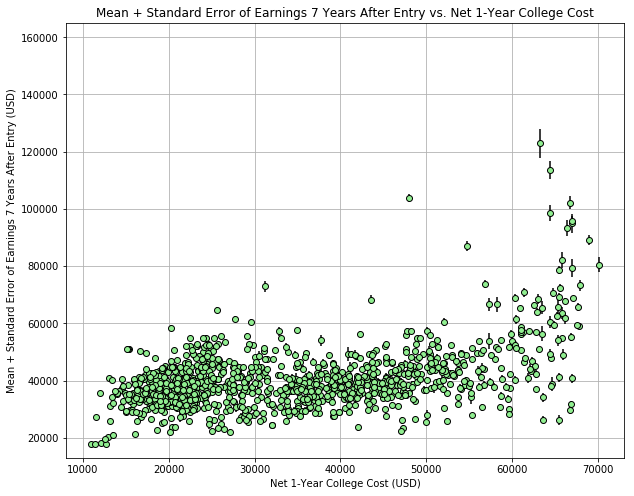

In [25]:
seven_means_ls = seven_means.tolist()
seven_sems_ls = seven_school_cost_df['Std Error of Mean'].tolist()

fig7, ax7 = plt.subplots(figsize=(10,8))

ax7.errorbar(x_axis, seven_means_ls, seven_sems_ls, fmt="o", color='lightgreen', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 7 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 7 Years After Entry (USD)')
plt.grid()
plt.ylim(13000,165000);

plt.savefig('7yr_earnings_v_cost.png')


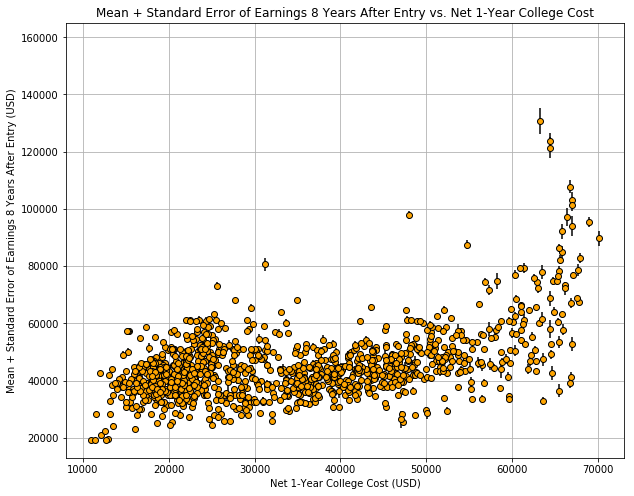

In [26]:
eight_means_ls = eight_means.tolist()
eight_sems_ls = eight_school_cost_df['Std Error of Mean'].tolist()

fig8, ax8 = plt.subplots(figsize=(10,8))

ax8.errorbar(x_axis, eight_means_ls, eight_sems_ls, fmt="o", color='orange', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 8 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 8 Years After Entry (USD)')
plt.grid()
plt.ylim(13000,165000);

plt.savefig('8yr_earnings_v_cost.png')

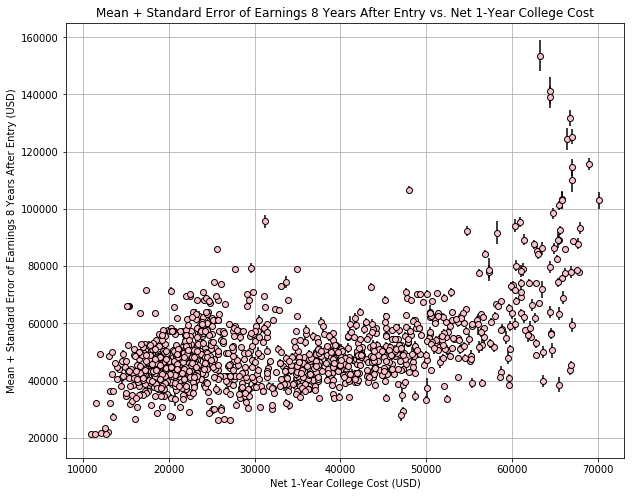

In [27]:
ten_means_ls = ten_means.tolist()
ten_sems_ls = ten_school_cost_df['Std Error of Mean'].tolist()

fig10, ax10 = plt.subplots(1, figsize=(10,8))

ax10.errorbar(x_axis, ten_means_ls, ten_sems_ls, fmt="o", color='pink', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 8 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 8 Years After Entry (USD)')
plt.grid()
plt.ylim(13000,165000);

plt.savefig('10yr_earnings_v_cost.png')

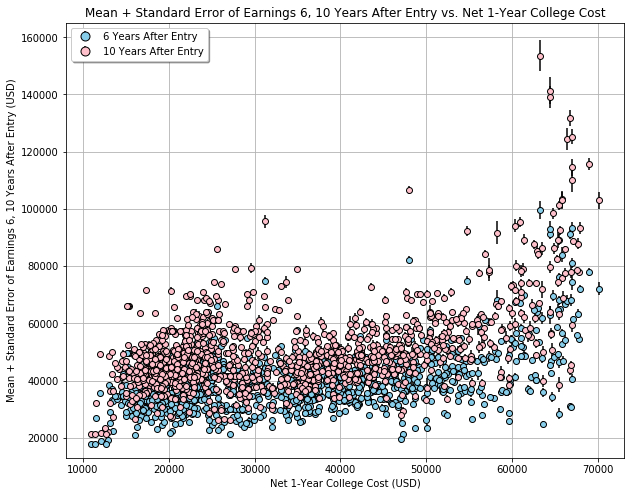

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(x_axis, six_means_ls, six_sems_ls, fmt="o", color='skyblue', markeredgecolor='black', ecolor='black');
# ax.errorbar(x_axis, seven_means_ls, seven_sems_ls, fmt="o", color='lightgreen', markeredgecolor='black', ecolor='black');
# ax.errorbar(x_axis, eight_means_ls, eight_sems_ls, fmt="o", color='orange', markeredgecolor='black', ecolor='black');
ax.errorbar(x_axis, ten_means_ls, ten_sems_ls, fmt="o", color='pink', markeredgecolor='black', ecolor='black')
plt.title('Mean + Standard Error of Earnings 6, 10 Years After Entry vs. Net 1-Year College Cost')
plt.xlabel('Net 1-Year College Cost (USD)')
plt.ylabel('Mean + Standard Error of Earnings 6, 10 Years After Entry (USD)')
plt.grid()
plt.ylim(13000,165000)
plt.legend(['6 Years After Entry', '10 Years After Entry'], markerscale=1.5, shadow=True);

plt.savefig('6v10yr_earnings_v_cost.png')
